In [ ]:

import  math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import time
import datetime
import pandas as pd

ticker = input("")
period1 = int(time.mktime(datetime.datetime(2012, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 4, 24, 23, 59).timetuple()))
interval = '1d' # 1d, 1m
x=ticker

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('STOCK.csv')
df


AAPL


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643497,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783869,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917508,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400
...,...,...,...,...,...,...,...
2589,2022-04-18,163.919998,166.600006,163.570007,165.070007,165.070007,69023900
2590,2022-04-19,165.020004,167.820007,163.910004,167.399994,167.399994,67723800
2591,2022-04-20,168.759995,168.880005,166.100006,167.229996,167.229996,67929800
2592,2022-04-21,168.910004,171.529999,165.910004,166.419998,166.419998,87227800


In [ ]:
df.shape

(2525, 7)

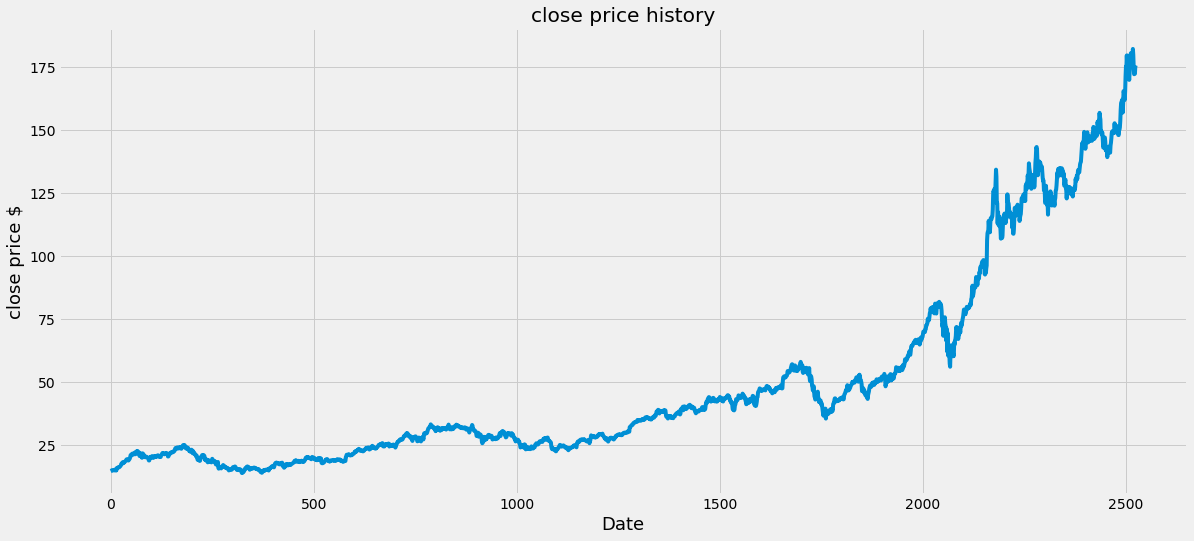

In [ ]:
plt.figure(figsize=(18,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price $',fontsize=18)
plt.show()

In [ ]:
 data =  df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2020

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439888],
       [0.00486851],
       [0.00584392],
       ...,
       [0.9415694 ],
       [0.95876538],
       [0.96144294]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
   print (x_train)
   print (y_train)
    

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334,
       0.0227679 , 0.02373267, 0.02371355, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873718, 0.03078787, 0.03228178,
       0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799])]
[0.04660893556292853]


In [ ]:
x_train,y_train =np.array(x_train),np.array(y_train)


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1960, 60, 1)

In [ ]:

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=1 , epochs=1)

1960/1960 [==============================] - 70s 34ms/step - loss: 2.2227e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test =[]
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test =np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
rmse =np.sqrt( np.mean(predictions-y_test)**2)
rmse

6.10368241401609

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


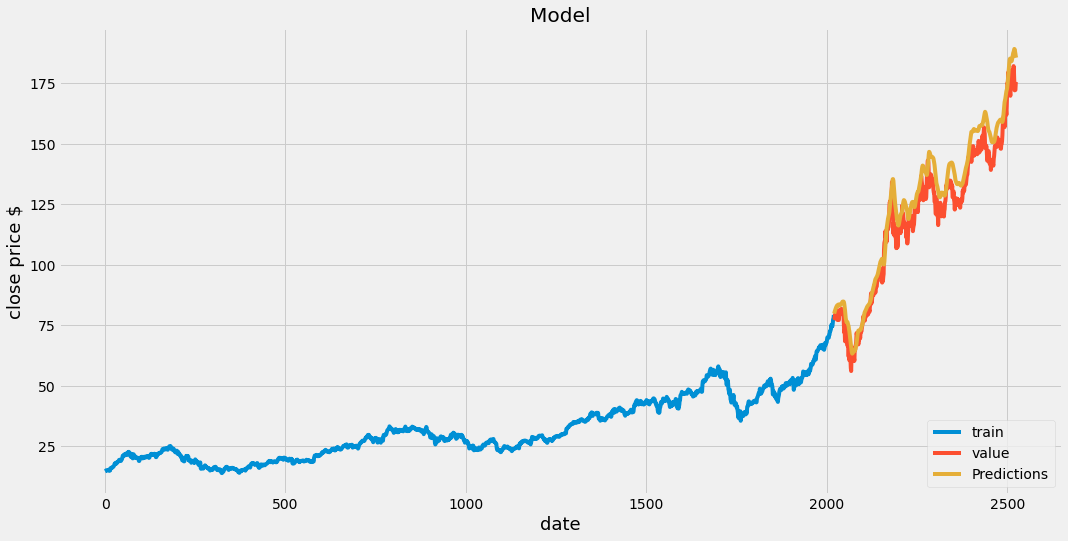

In [ ]:
train =data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','value','Predictions'],loc='lower right')
plt.show()


In [ ]:
valid

,Close,Predictions
2020,78.169998,79.801773
2021,77.834999,80.451729
2022,78.809998,80.940445
2023,79.682503,81.397675
2024,79.142502,81.882797
...,...,...
2520,172.000000,188.935989
2521,172.169998,188.144226
2522,172.190002,187.134277
2523,175.080002,186.098846


In [ ]:
#Get the quote
import time
import datetime
import pandas as pd

ticker = x
period1 = int(time.mktime(datetime.datetime(2021, 11, 14, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 12, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

qu_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

apple_quote = pd.read_csv(qu_string)


#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60: ].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days

X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(x_test)
#Reshape the data
X_test = np.reshape (X_test, (X_test.shape[0], X_test. shape[1], 1))
#Get the predicted scaled price
guess_price = model.predict(X_test)
#undo the scaling
guess_price = scaler.inverse_transform(guess_price)
print(guess_price[-1])


[185.47621]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#
dataset =pd.read_csv('//content/IDS_dataset.csv')
X=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

def Multilabelencoder(X,k):
    from sklearn.preprocessing import LabelEncoder
    X[:,k]= LabelEncoder().fit_transform(X[:,k])
    return X

for i in range(1,4):
    X=Multilabelencoder(X,i)
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#
import time
s=time.time()
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier2.fit(X_train,y_train)

from sklearn.svm import SVC
classifier3 = SVC(kernel ='linear', random_state=0)
classifier3.fit(X_train,y_train)

from sklearn.svm import SVC
classifier4 = SVC(kernel ='poly', random_state=0)
classifier4.fit(X_train,y_train)

from sklearn.svm import SVC
classifier5 = SVC(kernel ='rbf', random_state=0)
classifier5.fit(X_train,y_train)

from sklearn.svm import SVC
classifier6 = SVC(kernel ='sigmoid', random_state=0)
classifier6.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
classifier7 = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier7.fit(X_train,y_train)

from sklearn.naive_bayes import GaussianNB
classifier8 = GaussianNB()
classifier8.fit(X_train,y_train)

"""from sklearn.neighbors import KNeighborsClassifier
classifier9 = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier9.fit(X_train,y_train)"""
from sklearn.ensemble import RandomForestClassifier
classifier9 = RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=0)
classifier9.fit(X_train,y_train)

e=[classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8,classifier9]

X_first=X_test
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
    
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier2.fit(X_train,y_train)

from sklearn.svm import SVC
classifier3 = SVC(kernel ='linear', random_state=0)
classifier3.fit(X_train,y_train)

from sklearn.svm import SVC
classifier4 = SVC(kernel ='poly', random_state=0)
classifier4.fit(X_train,y_train)

from sklearn.svm import SVC
classifier5 = SVC(kernel ='rbf', random_state=0)
classifier5.fit(X_train,y_train)

from sklearn.svm import SVC
classifier6 = SVC(kernel ='sigmoid', random_state=0)
classifier6.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
classifier7 = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier7.fit(X_train,y_train)

from sklearn.naive_bayes import GaussianNB
classifier8 = GaussianNB()
classifier8.fit(X_train,y_train)

"""from sklearn.neighbors import KNeighborsClassifier
classifier9 = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier9.fit(X_train,y_train)"""

from sklearn.ensemble import RandomForestClassifier
classifier9 = RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=0)
classifier9.fit(X_train,y_train)
    
f=[classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8,classifier9]

g=["Logical Regression","Random Forest","Support Vector Machine - linear","Support Vector Machine - poly","Support Vector Machine - rbf",
   "Support Vector Machine - sigmoid","Decision Tree","Gaussian Naive Bayes","K-nearest Neighbours"]

def abc(h):
    warnings.filterwarnings("ignore")
    classifier=e[h]
    Y_pred = classifier.predict(X_first)
    #
    from  sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,Y_pred)
    #
    print("Accuracy of the "+g[h]+" Model is : ",(cm[0][0]+cm[1][1])*100/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
    print("Precision of the "+g[h]+" Model is : ",(cm[0][0])*100/(cm[0][0]+cm[1][0]))
    print("Recall of the "+g[h]+" Model is : ",(cm[0][0])*100/(cm[0][0]+cm[0][1]))
    #
    classifier=f[h]
    #
    Y_pred = classifier.predict(X_test)
    #
    from matplotlib.colors import ListedColormap
    X_set,y_set=X_test,y_test
    X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
    plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c = ['red', 'green'][i], label = j)
    plt.title('PDC for Prediction using '+g[h])
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    
import multiprocessing as mp
def master():
    if __name__=='__main__':
        while(1):
            warnings.filterwarnings("ignore")
            s=int(input("""\nWelcome to DDOS attack Network Detection System
                    Make your choice :
                    0. Logical Regression
                    1. Random Forest
                    2. Support Vector Machine - Linear
                    3. Support Vector Machine - Poly
                    4. Support Vector Machine - rbf
                    5. Support Vector Machine - Sigmoid
                    6. Decision Tree
                    7. Naive Bayes
                    8. K-nearest Neighbours
                    9. Run all Algorithms
                    10. Quit\n"""))
            if(s<9):
                abc(s)
            elif(s==9):
                s=int(input("""Select how you want to run it :
                                0. Serially
                                1. Parallelly
                                2. Go Back\n"""))
                if(s==0):
                    for i in range(9):
                        abc(i)
                elif(s==1):
                    parallel()
                elif(s==2):
                    pass;
                else:
                    print("INVALID CHOICE :( TRY AGAIN")
            elif(s==10):
                break;
            else:
                print("INVALID CHOICE :( TRY AGAIN")
    else:
        pass

def parallel():
    p = mp.Pool(9)
    for h in range(9):
        p.apply_async(abc, args=(h,))
    p.close()
    p.join()

master()

ParserError: ignored